**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Preview

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

  [1] "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"                                       
  [2] "hclust.col.annotation.prepare.chipseq_full.only.rds"                                          
  [3] "hclust.col.annotation.test_chrX.chipseq_full.only.rds"                                        
  [4] "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"                                       
  [5] "hclust.row.annotation.prepare.chipseq_full.only.rds"                                          
  [6] "hclust.row.annotation.test_chrX.chipseq_full.only.rds"                                        
  [7] "hdbscan.metric_euclidean.min_cluster_size_1e2.umap.prepare.cre.chipseq_full.fcc.tss.pkl"      
  [8] "hdbscan.metric_euclidean.min_cluster_size_1e3.umap.prepare.cre.chipseq_full.fcc.tss.pkl"      
  [9] "hdbscan.metric_manhattan.min_cluster_size_1e2.annotation.prepare.cre.chipseq_full.fcc.pkl"    
 [10] "hdbscan.metric_manhattan.min_cluster_size_1e2.annotation.prepare.cre.chipse

## Import data

In [3]:
vec_txt_metric    = c("manhattan", "cosine", "hamming", "jaccard")
vec_num_neighbors = c("15", "70")

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

[1] "umap.metric_manhattan.n_neighbors_15"
[2] "umap.metric_cosine.n_neighbors_15"   
[3] "umap.metric_hamming.n_neighbors_15"  
[4] "umap.metric_jaccard.n_neighbors_15"  
[5] "umap.metric_manhattan.n_neighbors_70"
[6] "umap.metric_cosine.n_neighbors_70"   
[7] "umap.metric_hamming.n_neighbors_70"  
[8] "umap.metric_jaccard.n_neighbors_70"  


In [46]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "annotation.test_chrX.chipseq_full.fcc.tss.tsv",
        sep = "."
    )
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst

In [47]:
### init
lst = lst_dat_umap
num = 1000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point() + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

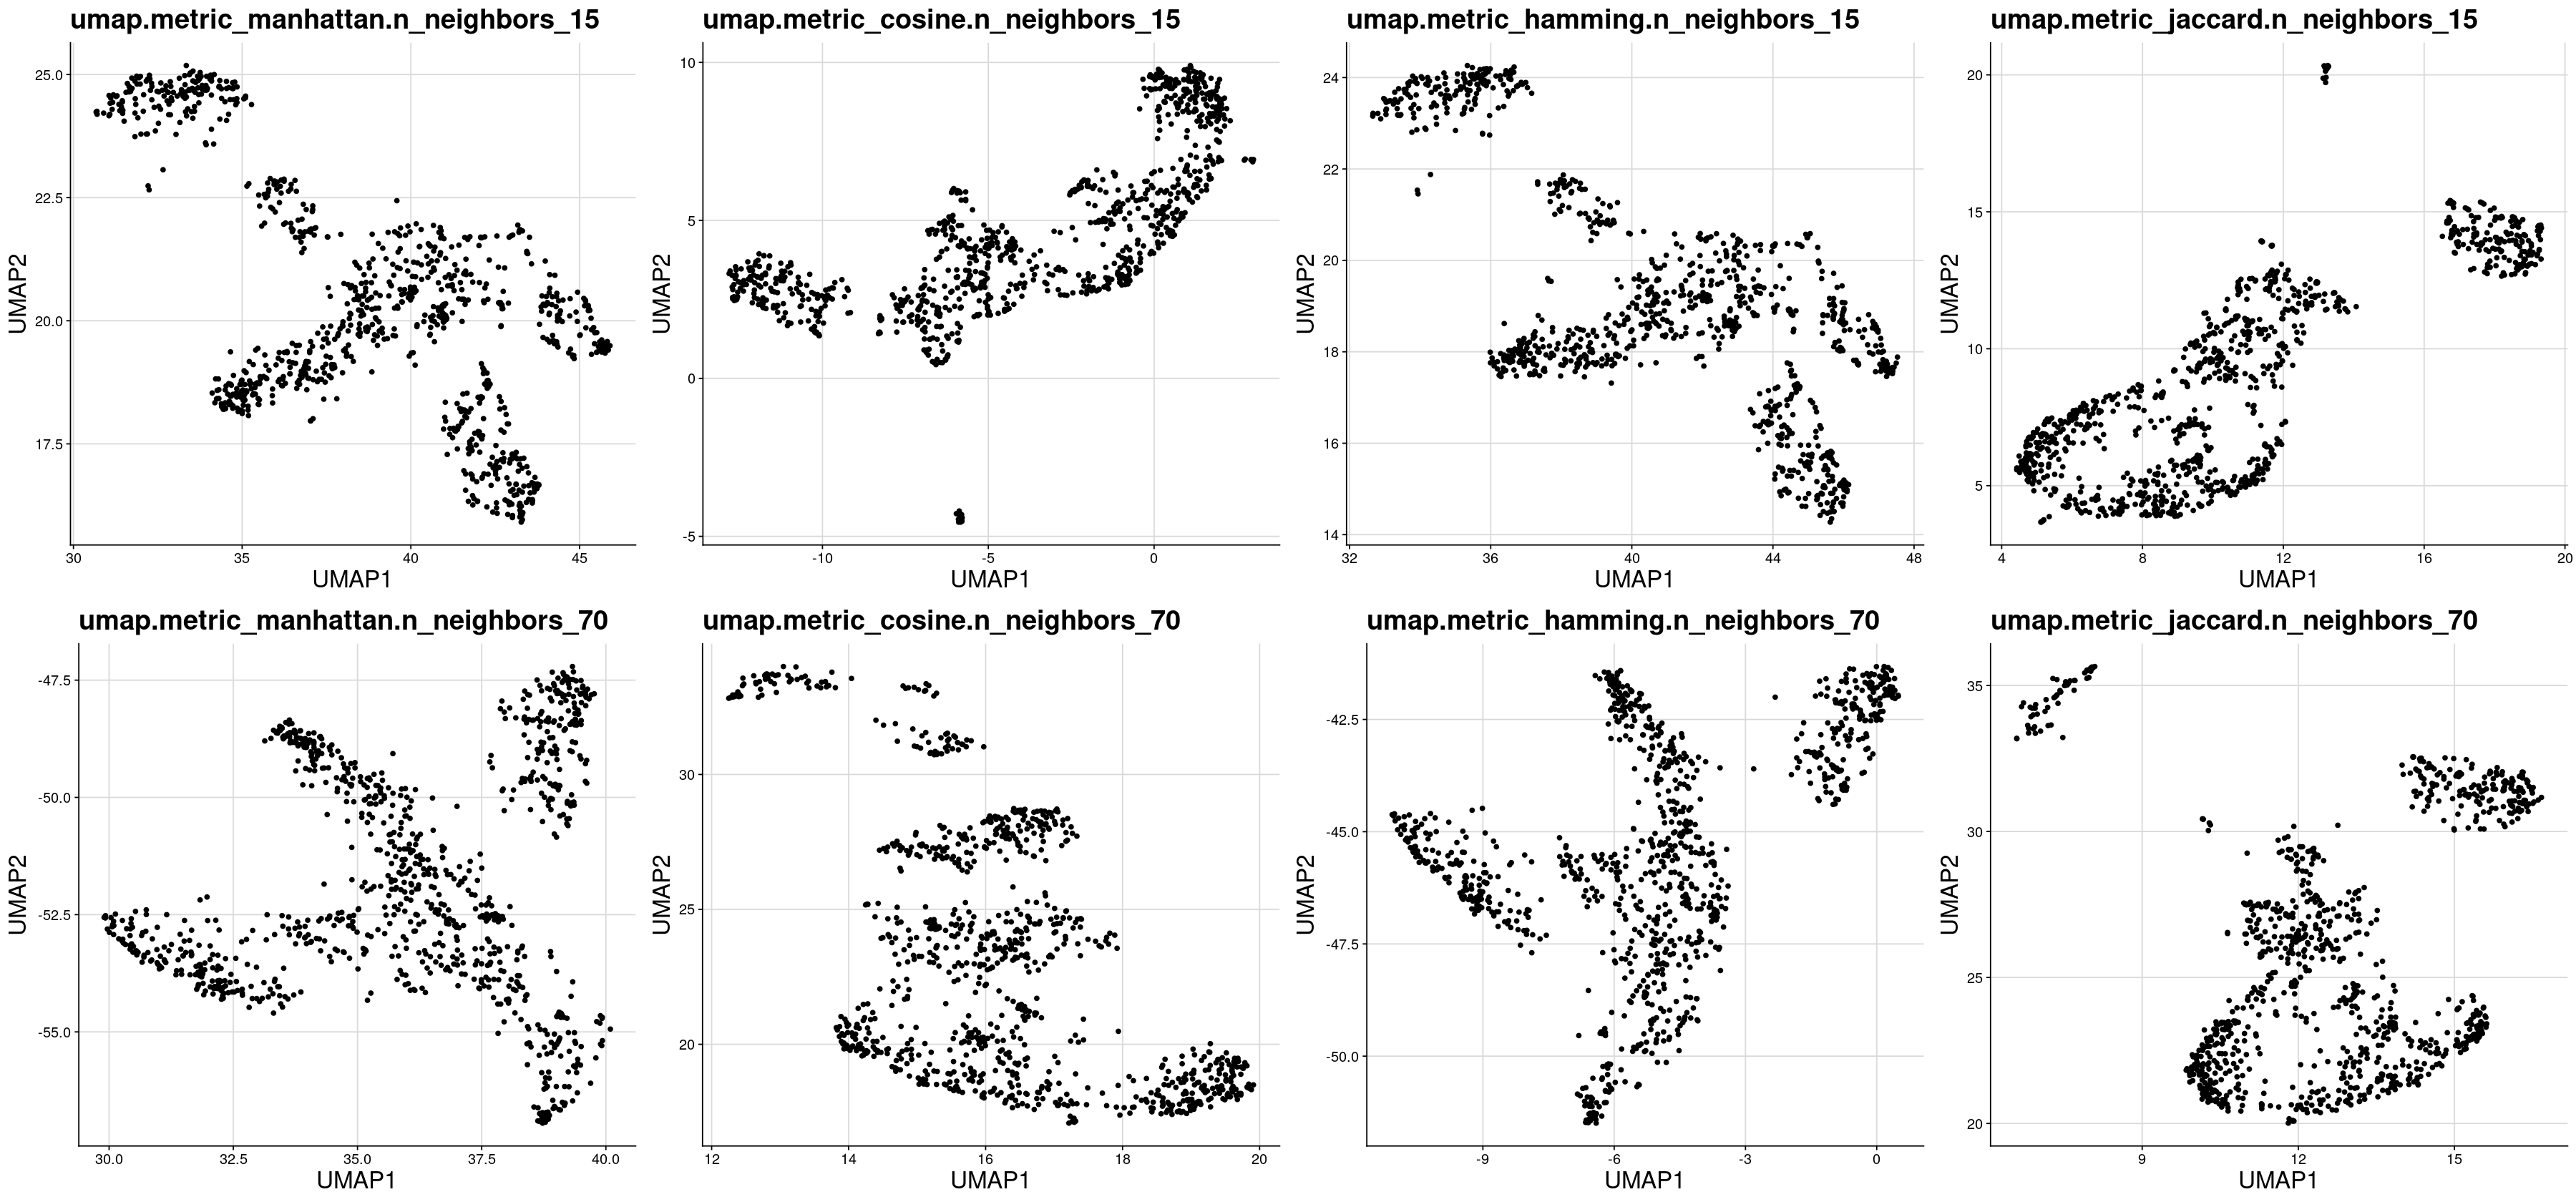

In [50]:
options(repr.plot.height=14, repr.plot.width=30)
plot_grid(plotlist = lst_gpt, nrow=2)

In [4]:
vec_txt_metric    = c("euclidean")
vec_num_neighbors = c("15", "70")

dat = expand.grid(X = vec_txt_metric, Y = vec_num_neighbors)
dat = dat %>% dplyr::mutate(
    Z = paste(
        "umap",
        paste("metric",      X, sep = "_"),
        paste("n_neighbors", Y, sep = "_"),
        sep = "."
    )
)
vec_txt_prefix = dat$Z
print(vec_txt_prefix)

[1] "umap.metric_euclidean.n_neighbors_15"
[2] "umap.metric_euclidean.n_neighbors_70"


In [7]:
### set directory
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)

### import data
lst = lapply(vec_txt_prefix, function(txt_prefix){
    
    txt_fname = paste(
        txt_prefix, 
        "mca_exp90.test_chrX.chipseq_full.fcc.tss.tsv",
        sep = "."
    )
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_prefix

### assign
lst_dat_umap = lst
print(length(lst))

[1] 2


In [8]:
### init
lst = lst_dat_umap
num = 1000

###
theme_txt = theme(title = element_text(size=20))

###
lst = lapply(names(lst), function(txt){

    ### get data
    dat = lst[[txt]]
    
    ### sample rows
    set.seed(123)
    idx = sort(sample(1:nrow(dat), size = num))
    dat = dat[idx,]

    ### plot
    gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
        geom_point() + 
        labs(title = txt) +
        theme_cowplot() + 
        background_grid() +
        theme_txt
    
    return(gpt)
})

lst_gpt = lst

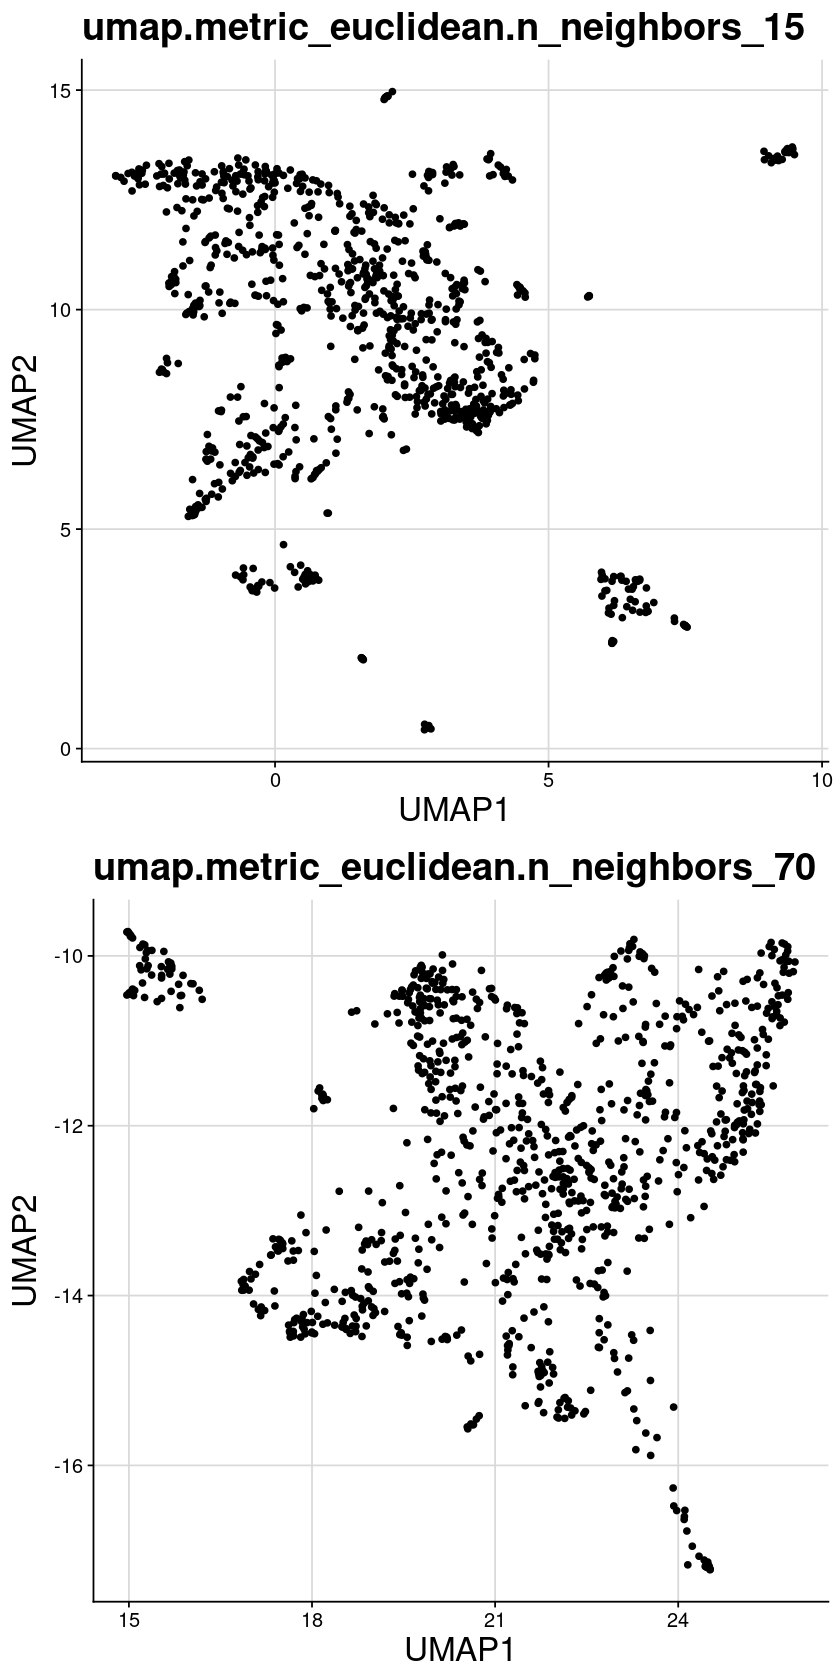

In [9]:
options(repr.plot.height=14, repr.plot.width=7)
plot_grid(plotlist = lst_gpt, nrow=2)